In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
# %matplotlib inline

import numpy as np
import sys
import commpy
import struct
import matplotlib.pyplot as plt
import scipy

from LoRaDecoder import LoRaDecoder



(512,)
(512,)
None


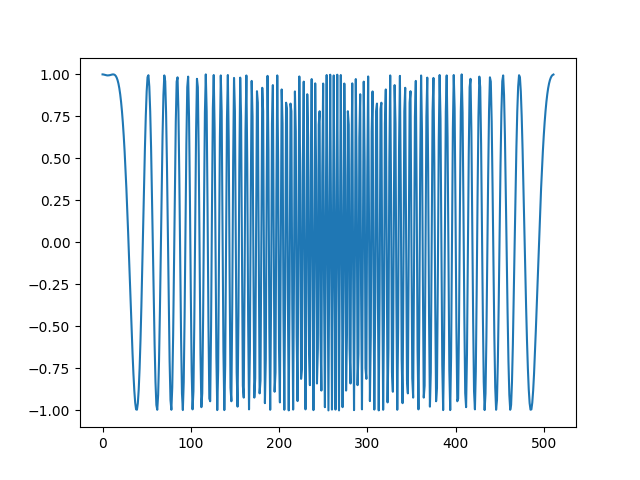

In [2]:
rf_freq = 915e6    # carrier frequency 470 MHz, used to correct clock drift
sf = 8             # spreading factor SF7
bw = 125e3         # bandwidth 125 kHz
fs = 250e3         # sampling rate 1 MHz

phy = LoRaDecoder()



uc = phy.chirp(True,sf,bw,fs,125,0,0)


plt.figure()
plt.plot(np.real(uc))
print(uc.shape)


dc = phy.chirp(False,sf,bw,fs,1,0,0)
print(print(dc.shape))


In [76]:
fileName = './EE595 Project Data/dataSF8CR8packet1.bin'

raw = phy.read_complex(fileName)

print(raw.shape)


plt.figure()
plt.plot(np.real(raw.T))
plt.show()

(1, 142987)


<IPython.core.display.Javascript object>

(142987,)
(1536,)
(0.007764416333073437-0.007860289530717202j)


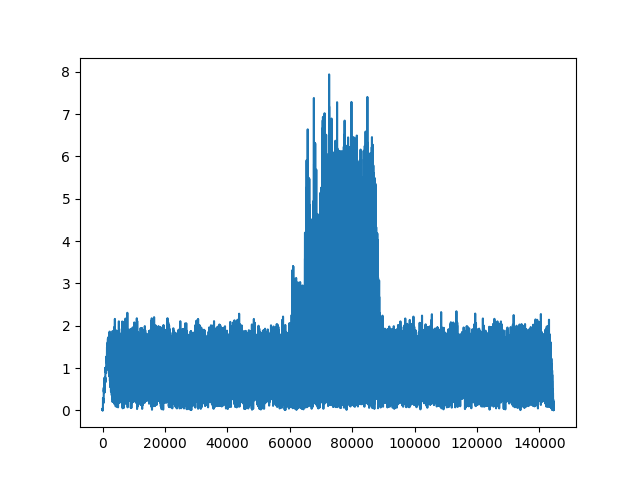

In [3]:
fileName = './EE595 Project Data/dataSF8CR8packet1.bin'

raw = phy.read_complex(fileName)

rf_freq = 915e6    # carrier frequency 470 MHz, used to correct clock drift
sf = 7             # spreading factor SF7
bw = 125e3         # bandwidth 125 kHz
fs = 250e3         # sampling rate 1 MHz
preamble_len = 6

phy = LoRaDecoder()

uc = phy.chirp(True, sf, bw, fs, 0, 0, 0)
dc = phy.chirp(False, sf, bw, fs, 0, 0, 0)

import numpy.matlib

raw = raw.flatten()
preamble = np.matlib.repmat(uc, 1, preamble_len).flatten()


print(raw.shape)
print(preamble.shape)
res = np.correlate(raw.T, preamble.T, 'full')

print(res[0])

plt.figure()
plt.plot(abs(res))
plt.show()

In [11]:
a = np.array(range(5))
print(a)
print(a*a)
print(a**2)

[0 1 2 3 4]
[ 0  1  4  9 16]
[ 0  1  4  9 16]


In [15]:
print([1,2] + [3,4])
print(np.arange(0,2))

[1, 2, 3, 4]
[0 1]
